In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('Africa_climate_change.csv')
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [3]:
# Initial Exploration

# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [4]:
# Descriptive Analysis
df.describe()

,PRCP,TAVG,TMAX,TMIN
count,177575.000000,458439.000000,363901.000000,332757.000000
mean,0.120941,77.029838,88.713969,65.548262
std,0.486208,11.523634,13.042631,11.536547
min,0.000000,-49.000000,41.000000,12.000000
25%,0.000000,70.000000,81.000000,58.000000
50%,0.000000,80.000000,90.000000,68.000000
75%,0.010000,85.000000,99.000000,74.000000
max,19.690000,110.000000,123.000000,97.000000


In [5]:
# Identifying missing values
df.isna().sum()

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64

Handle Missing Values

In [6]:
# 1. Drop the PRCP column, it has a lot of missing values compared to the total rows on the dataset that if replaced may affect analysis and it's not required in our current analysis
df = df.drop(columns=['PRCP'])


In [7]:
# 2. Remove rows with missing values in TAVG
df = df.dropna(subset=['TAVG'])

In [8]:
# 3. Impute missing values in TMAX and TMIN using median per country
df['TMAX'] = df.groupby('COUNTRY')['TMAX'].transform(lambda x: x.fillna(x.median()))
df['TMIN'] = df.groupby('COUNTRY')['TMAX'].transform(lambda x: x.fillna(x.median()))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458439 entries, 0 to 464814
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     458439 non-null  object 
 1   TAVG     458439 non-null  float64
 2   TMAX     458439 non-null  float64
 3   TMIN     458439 non-null  float64
 4   COUNTRY  458439 non-null  object 
dtypes: float64(3), object(2)
memory usage: 21.0+ MB


In [10]:
# Convert DATE column to datetime datatype
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d %H%M%S', errors='coerce')

In [11]:
df.head()

,DATE,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,54.0,61.0,61.0,Tunisia
1,1980-01-01,49.0,55.0,55.0,Tunisia
2,1980-01-01,72.0,86.0,86.0,Cameroon
3,1980-01-01,50.0,55.0,55.0,Tunisia
4,1980-01-01,75.0,91.0,91.0,Cameroon


In [12]:
#Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. 

# 1. Filter data for Tunisia and Cameroon
countries = ['Tunisia', 'Cameroon']
df_filtered = df[df['COUNTRY'].isin(countries)].copy()


In [13]:
# 2. Sort by date to keep chronological order
df_filtered.sort_values('DATE', inplace=True)

# 3. Set the DATE as the index for resampling
df_filtered.set_index('DATE', inplace=True)

# 4. Resample to monthly averages per country
df_monthly = df_filtered.groupby('COUNTRY').resample('ME').mean().reset_index()

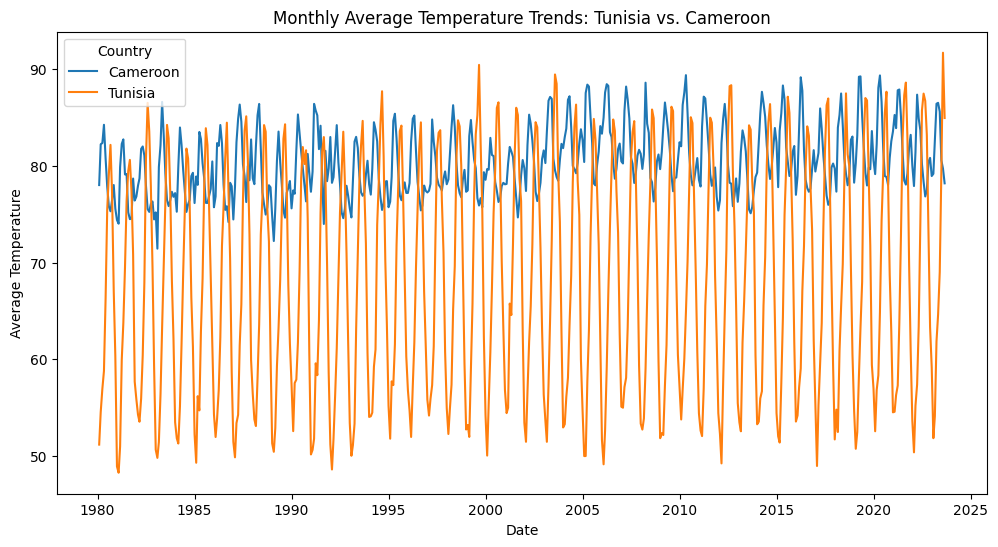

In [14]:
# 5. Plot the monthly average temperature
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='DATE', y='TAVG', hue='COUNTRY')
plt.title('Monthly Average Temperature Trends: Tunisia vs. Cameroon')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend(title='Country')
plt.show()

Result interpretation
- `Cameroon` maintains relatively stable temperatures throughout the years, following a temperature range of `around 70⁰F and 90⁰F`

- `Tunisia` shows extreme temperature fluctuations with temperatures dropping upto `below 50⁰F in colder months and rising above 90⁰F in hotter months`

In [15]:
# Zoom in to only include data between 1980 and 2005, try to customize the axes labels.

# Filter the data for dates between 1980 and 2005
mask = (df['DATE'].dt.year >= 1980) & (df['DATE'].dt.year <= 2005)
# store and filter masked data for Tunisia and Cameroon
df_zoom = df.loc[mask & df['COUNTRY'].isin(['Tunisia', 'Cameroon'])].copy()

# Set the DATE as index and resample to monthly means
df_zoom.set_index('DATE', inplace=True)
df_monthly_zoom = df_zoom.groupby('COUNTRY').resample('ME').mean().reset_index()



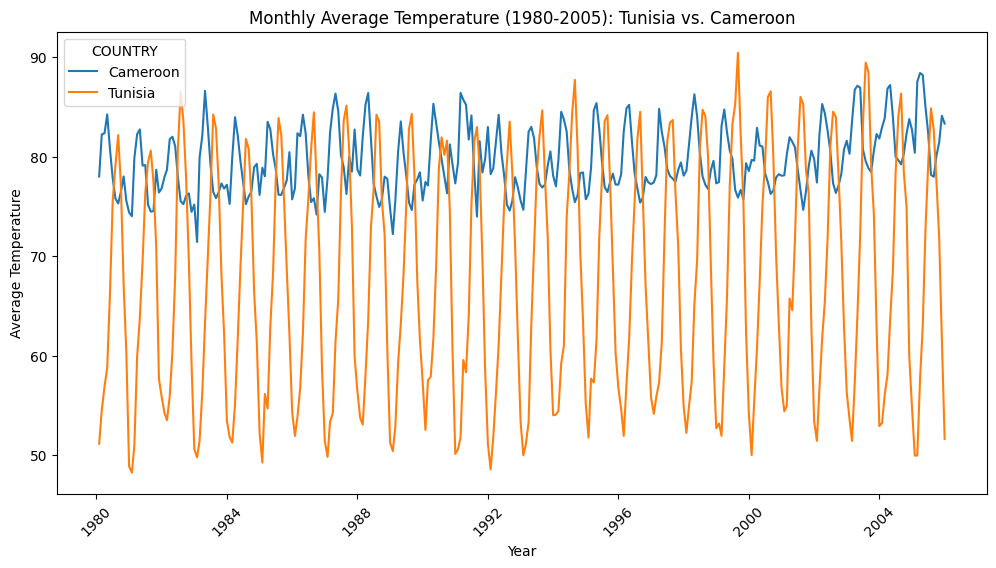

In [16]:
#plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly_zoom, x='DATE', y='TAVG', hue='COUNTRY')
plt.title('Monthly Average Temperature (1980-2005): Tunisia vs. Cameroon')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.show()

In [17]:
# Create Histograms to show temperature distribution in Senegal between [1980,2000] 
# and [2000,2023] (in the same figure). Describe the obtained results.

# Filter the data for Senegal
df_senegal = df[df['COUNTRY'] == 'Senegal'].copy()

# Filter the data for the two time periods
df_senegal_1980_2000 = df_senegal[(df_senegal['DATE'].dt.year >= 1980) & (df_senegal['DATE'].dt.year <= 2000)]
df_senegal_2000_2023 = df_senegal[(df_senegal['DATE'].dt.year > 2000) & (df_senegal['DATE'].dt.year <= 2023)]

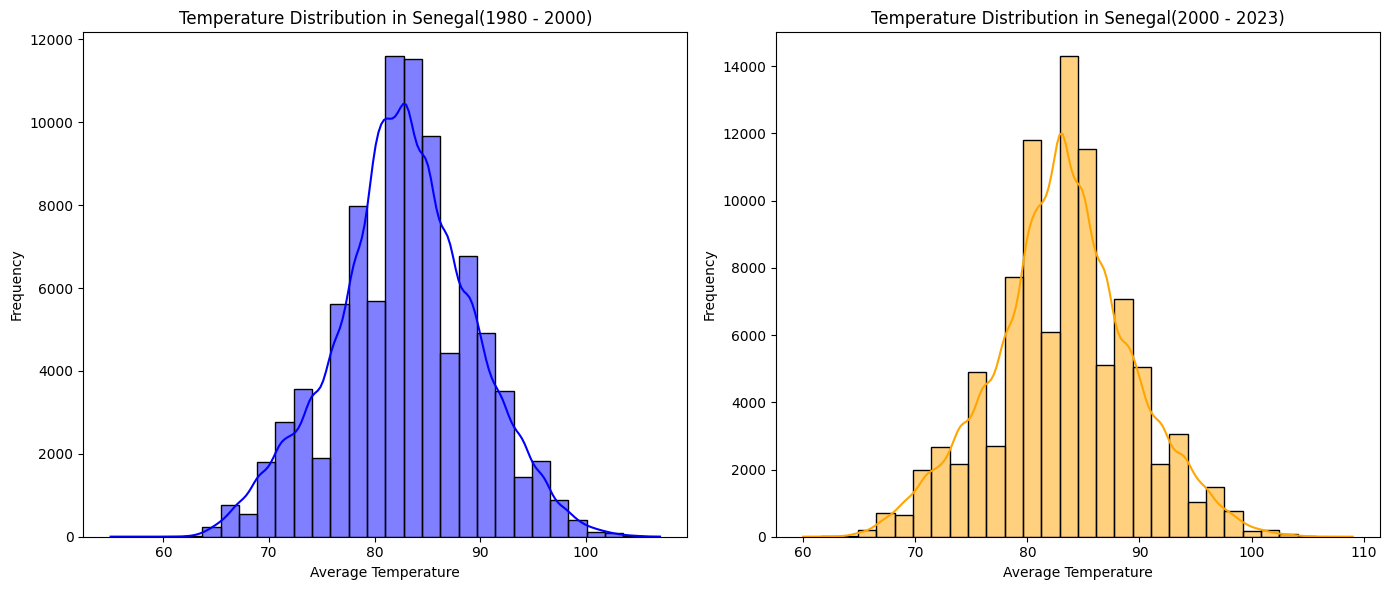

In [18]:
# Create a figure for two subplots side by side
plt.figure(figsize=(14, 6))

# Histogram for 1980 - 2000
plt.subplot(1, 2, 1)
sns.histplot(df_senegal_1980_2000['TAVG'], bins=30, kde=True, color='blue')
plt.title('Temperature Distribution in Senegal(1980 - 2000)')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')


# Histogram for 2000 - 2023
plt.subplot(1, 2, 2)
sns.histplot(df_senegal_2000_2023['TAVG'], bins=30, kde=True, color='orange')
plt.title('Temperature Distribution in Senegal(2000 - 2023)')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

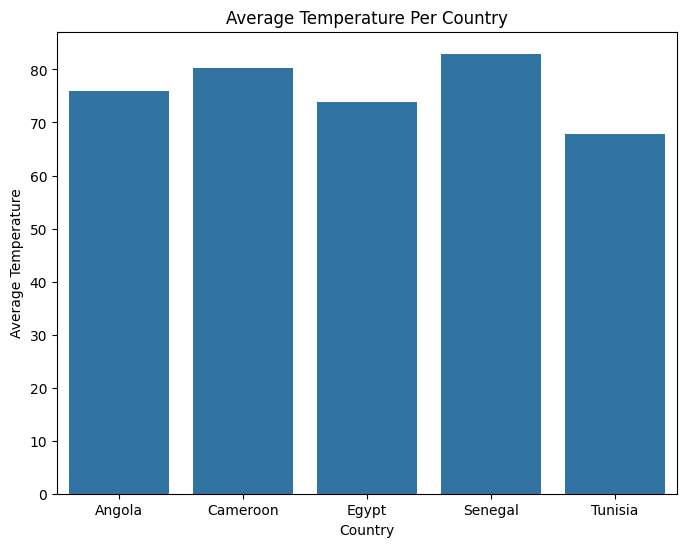

In [19]:
# Select the best chart to show the Average temperature per country.

#Average Temperature per Country
avg_temp_country = df.groupby('COUNTRY')['TAVG'].mean().reset_index()

#Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_temp_country, x='COUNTRY', y='TAVG')
plt.title('Average Temperature Per Country')
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.show()

In [20]:
# Seasonal Pattern of Average Temperature in Senegal

# Filter data for Senegal
df_senegal = df[df['COUNTRY'] == 'Senegal'].copy()

# Create a 'month' column
df_senegal['month'] = df_senegal['DATE'].dt.month

# Calculate average TAVG per month
monthly_avg = df_senegal.groupby('month')['TAVG'].mean().reset_index()

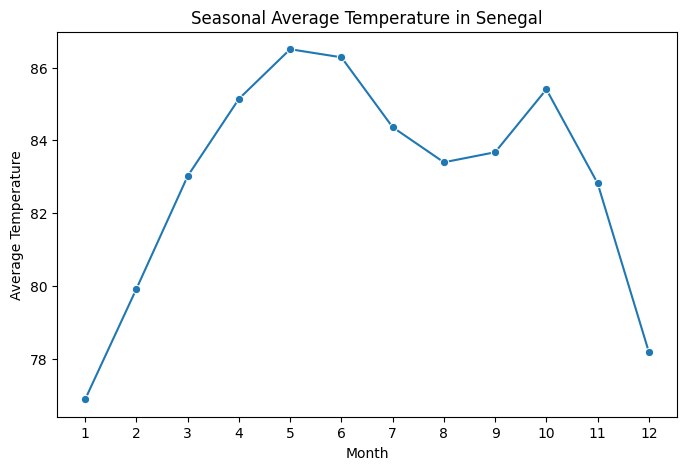

In [21]:
# plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_avg, x='month', y='TAVG', marker='o')
plt.title('Seasonal Average Temperature in Senegal')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(range(1, 13))
plt.show()


- Temperatures in `Senegal` appear to be warm/hot throughout the year with it's lowest temperatures experienced between December and January i.e `below 80⁰F`